In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Churn.csv')
df

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [9]:
print("Data info",df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AccountLength  3333 non-null   int64  
 1   VMailMessage   3333 non-null   int64  
 2   DayMins        3333 non-null   float64
 3   EveMins        3333 non-null   float64
 4   NightMins      3333 non-null   float64
 5   IntlMins       3333 non-null   float64
 6   CustServCalls  3333 non-null   int64  
 7   Churn          3333 non-null   int64  
 8   IntlPlan       3333 non-null   int64  
 9   VMailPlan      3333 non-null   int64  
 10  DayCalls       3333 non-null   int64  
 11  DayCharge      3333 non-null   float64
 12  EveCalls       3333 non-null   int64  
 13  EveCharge      3333 non-null   float64
 14  NightCalls     3333 non-null   int64  
 15  NightCharge    3333 non-null   float64
 16  IntlCalls      3333 non-null   int64  
 17  IntlCharge     3333 non-null   float64
 18  State   

In [11]:
df.shape

(3333, 21)

In [12]:
df.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [13]:
#check the null values
((df.isnull().sum()*100)/len(df)).sort_values(ascending=False)

AccountLength    0.0
DayCharge        0.0
AreaCode         0.0
State            0.0
IntlCharge       0.0
IntlCalls        0.0
NightCharge      0.0
NightCalls       0.0
EveCharge        0.0
EveCalls         0.0
DayCalls         0.0
VMailMessage     0.0
VMailPlan        0.0
IntlPlan         0.0
Churn            0.0
CustServCalls    0.0
IntlMins         0.0
NightMins        0.0
EveMins          0.0
DayMins          0.0
Phone            0.0
dtype: float64

In [14]:
#check the unique values
df.nunique()

AccountLength     212
VMailMessage       46
DayMins          1667
EveMins          1611
NightMins        1591
IntlMins          162
CustServCalls      10
Churn               2
IntlPlan            2
VMailPlan           2
DayCalls          119
DayCharge        1667
EveCalls          123
EveCharge        1440
NightCalls        120
NightCharge       933
IntlCalls          21
IntlCharge        162
State              51
AreaCode            3
Phone            3333
dtype: int64

In [16]:
# 
churn = df[df.Churn == 'Yes']
non_churn = df[df.Churn == 'No']
churn

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone


In [17]:
non_churn

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone


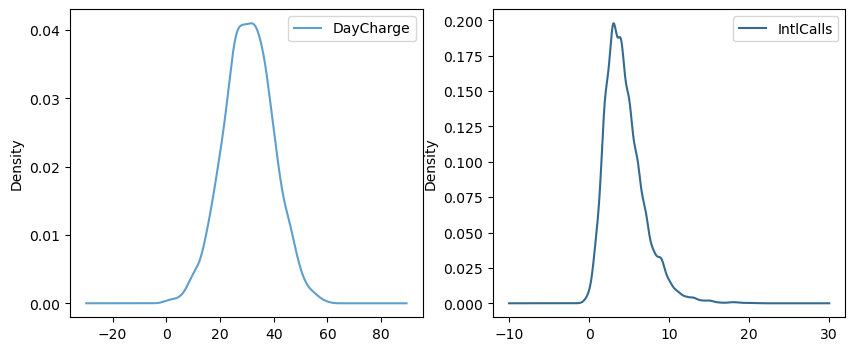

In [93]:
df[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4));

In [37]:
#Churn Vs SeniorCitizen

 

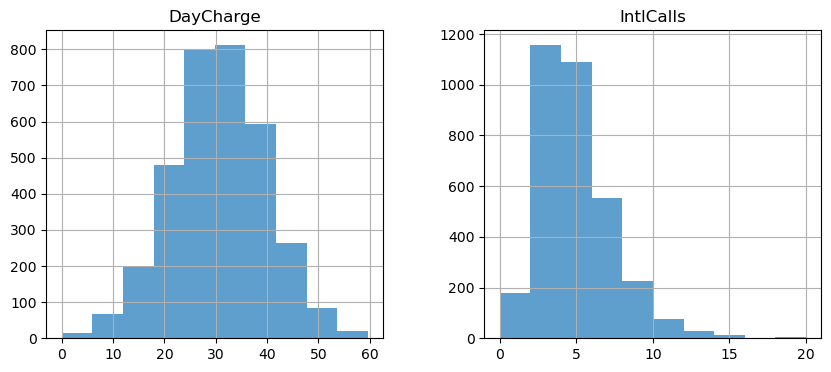

In [45]:
features = ['DayCharge', 'IntlCalls']
df[features].hist(figsize=(10,4));

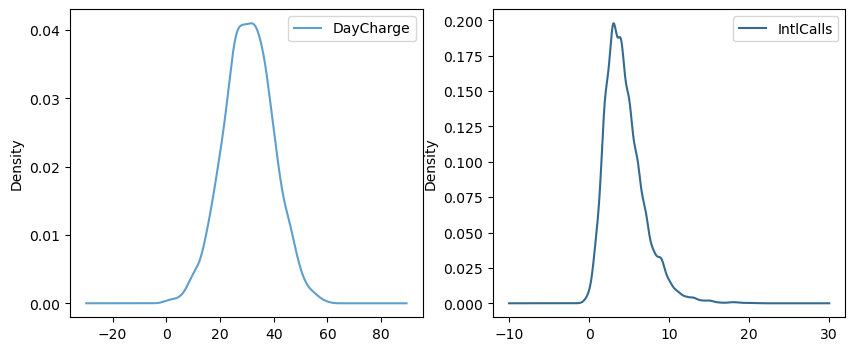

In [46]:
df[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4));

C:\Users\tiwar\AppData\Local\Temp\ipykernel_2584\3176809091.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='IntlCalls', ylabel='Density'>

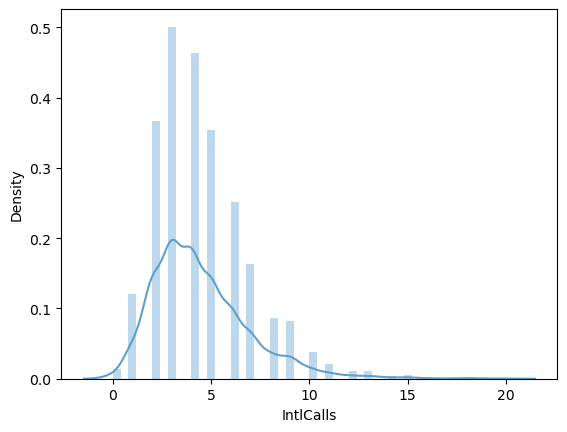

In [48]:
x = df['IntlCalls']
sns.distplot(x)

<Axes: xlabel='IntlCalls'>

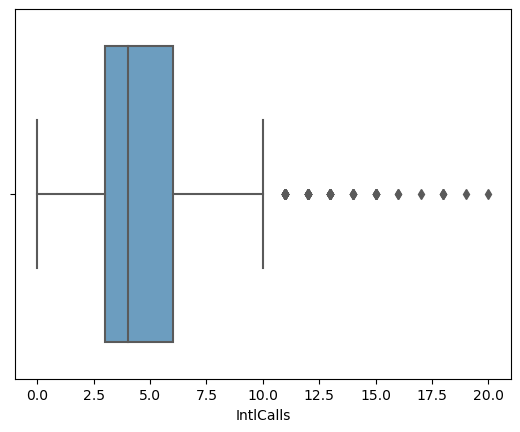

In [49]:
sns.boxplot(x = 'IntlCalls', data = df)

<Axes: xlabel='DayCharge'>

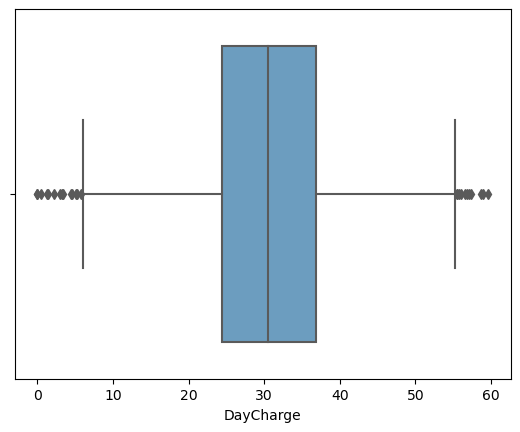

In [26]:
sns.boxplot(x=df['DayCharge'])

<Axes: xlabel='NightCharge'>

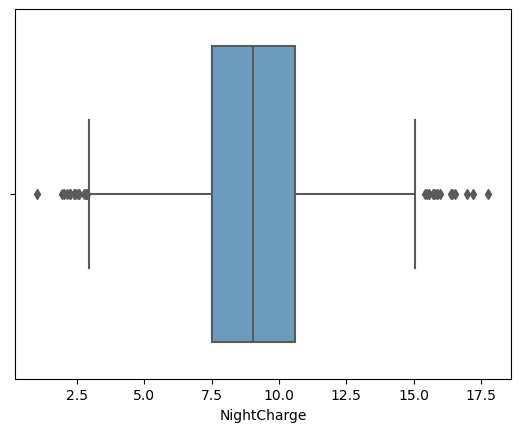

In [28]:
sns.boxplot(x=df['NightCharge'])

<Axes: >

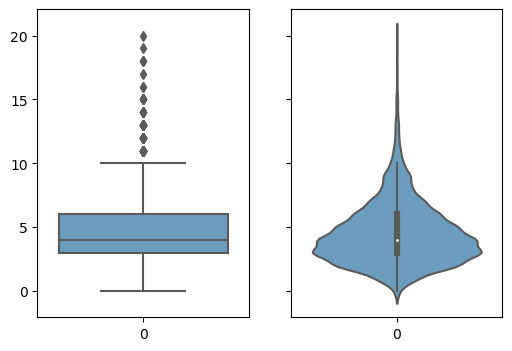

In [50]:
 _, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['IntlCalls'], ax=axes[0]);
sns.violinplot(data=df['IntlCalls'], ax = axes[1])

In [51]:
 df[features].describe()

,DayCharge,IntlCalls
count,3333.000000,3333.000000
mean,30.562307,4.479448
std,9.259435,2.461214
min,0.000000,0.000000
25%,24.430000,3.000000
50%,30.500000,4.000000
75%,36.790000,6.000000
max,59.640000,20.000000


In [53]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [ ]:
# Bar Plot

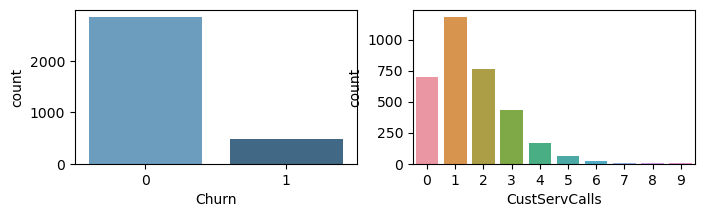

In [55]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

sns.countplot(x='Churn', data = df, ax = axes[0])
sns.countplot(x='CustServCalls', data = df, ax = axes[1]);

In [81]:
x = list(set(df.columns)-set(['State', 'IntlPlan', 'VMailPlan',
                                     'AreaCode', 'Churn', 'CustServCalls']))


In [96]:
x

['EveMins',
 'DayCharge',
 'VMailMessage',
 'NightCharge',
 'Phone',
 'IntlCharge',
 'NightCharges',
 'DayCalls',
 'IntlCalls',
 'DayMins',
 'EveCalls',
 'IntlMins',
 'EveCharge',
 'NightCalls',
 'NightMins',
 'TotalCharges',
 'AccountLength']

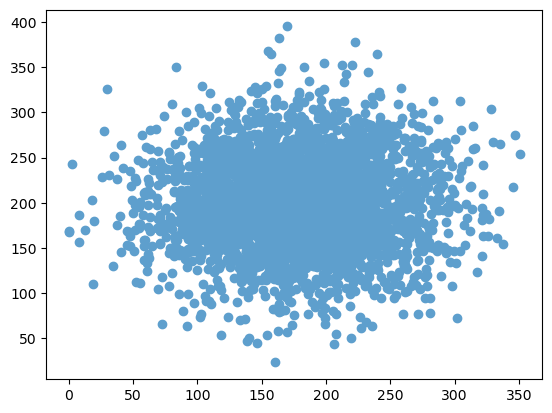

In [98]:
plt.scatter(df['DayMins'], df['NightMins']);

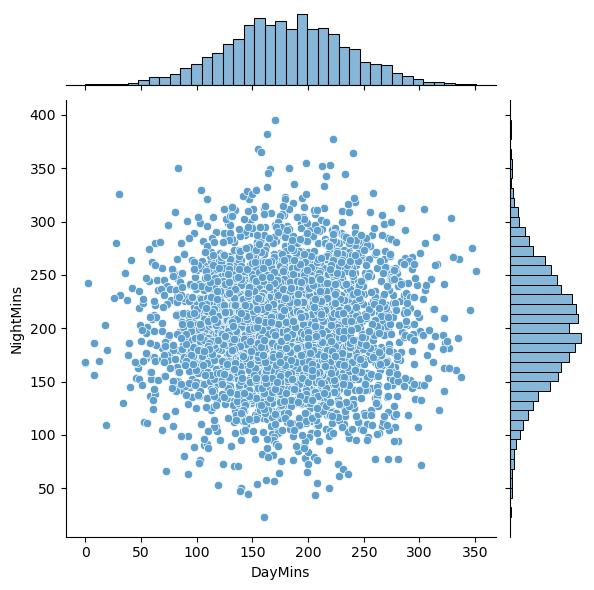

In [99]:
sns.jointplot(x='DayMins', y='NightMins', data=df, kind = 'scatter');

In [114]:
numerical = list(set(numerical)-set(['Phone']))

IndexError: index 3 is out of bounds for axis 0 with size 3

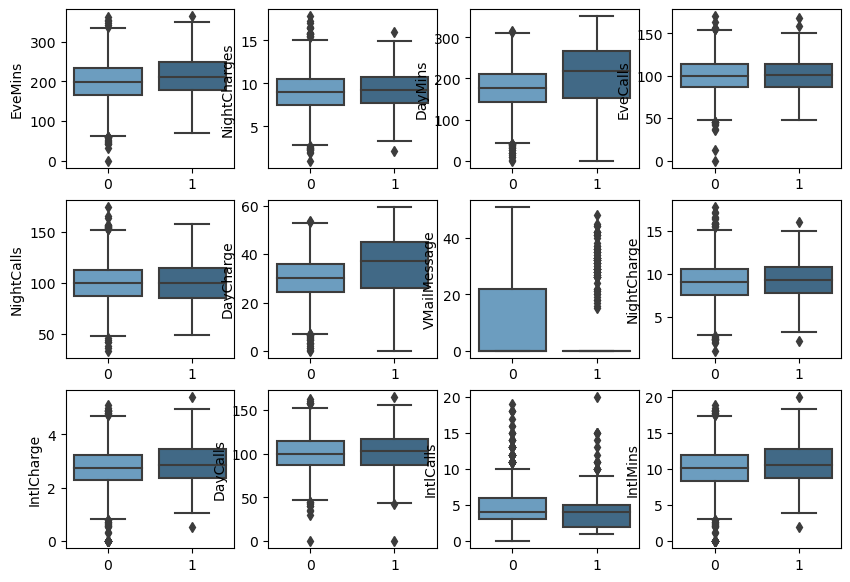

In [115]:
numerical.append('CustServCall')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y = feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

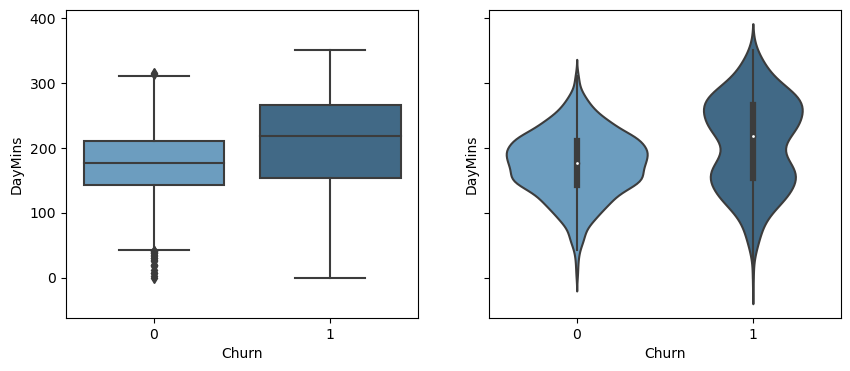

In [118]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='DayMins', data = df, ax = axes[0]);
sns.violinplot(x='Churn', y='DayMins', data = df, ax = axes[1]);

F:\Nandani\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


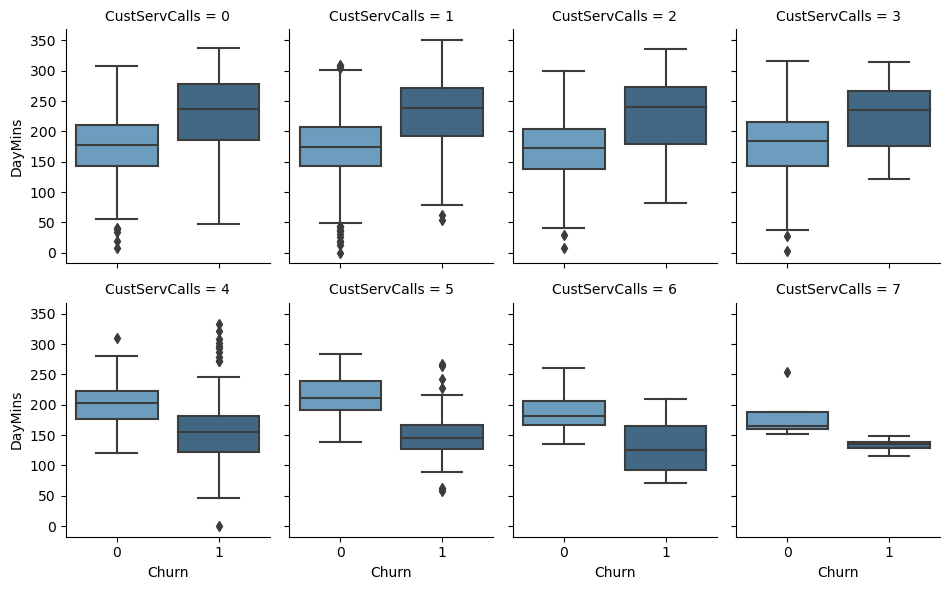

In [120]:
sns.catplot(x='Churn', y = 'DayMins', col='CustServCalls',        data=df[df['CustServCalls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

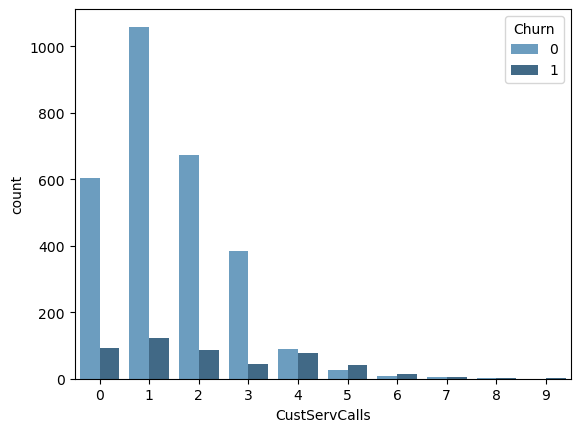

In [121]:
sns.countplot(x='CustServCalls', hue='Churn', data=df);

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AccountLength  3333 non-null   int64  
 1   VMailMessage   3333 non-null   int64  
 2   DayMins        3333 non-null   float64
 3   EveMins        3333 non-null   float64
 4   NightMins      3333 non-null   float64
 5   IntlMins       3333 non-null   float64
 6   CustServCalls  3333 non-null   int64  
 7   Churn          3333 non-null   int64  
 8   IntlPlan       3333 non-null   int64  
 9   VMailPlan      3333 non-null   int64  
 10  DayCalls       3333 non-null   int64  
 11  DayCharge      3333 non-null   float64
 12  EveCalls       3333 non-null   int64  
 13  EveCharge      3333 non-null   float64
 14  NightCalls     3333 non-null   int64  
 15  NightCharge    3333 non-null   float64
 16  IntlCalls      3333 non-null   int64  
 17  IntlCharge     3333 non-null   float64
 18  State   

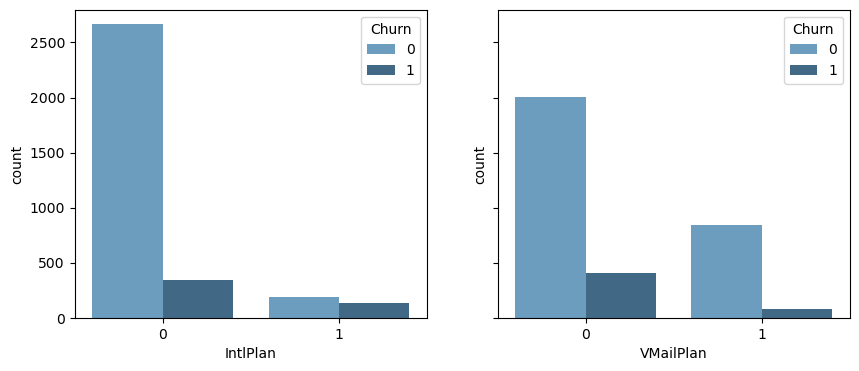

In [123]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(10,4))

sns.countplot(x = 'IntlPlan', hue = 'Churn', data = df, ax = axes[0]);
sns.countplot(x = 'VMailPlan', hue = 'Churn', data = df, ax = axes[1]);

In [124]:
pd.crosstab(df['State'], df['Churn'])

Churn,0,1
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [125]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False)

,mean
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [126]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AccountLength  3333 non-null   int64  
 1   VMailMessage   3333 non-null   int64  
 2   DayMins        3333 non-null   float64
 3   EveMins        3333 non-null   float64
 4   NightMins      3333 non-null   float64
 5   IntlMins       3333 non-null   float64
 6   CustServCalls  3333 non-null   int64  
 7   Churn          3333 non-null   int64  
 8   IntlPlan       3333 non-null   int64  
 9   VMailPlan      3333 non-null   int64  
 10  DayCalls       3333 non-null   int64  
 11  DayCharge      3333 non-null   float64
 12  EveCalls       3333 non-null   int64  
 13  EveCharge      3333 non-null   float64
 14  NightCalls     3333 non-null   int64  
 15  NightCharge    3333 non-null   float64
 16  IntlCalls      3333 non-null   int64  
 17  IntlCharge     3333 non-null   float64
 18  State   

In [128]:
X = df.drop(['Churn', 'State', 'Phone'], axis = 1)
X['IntlPlan'] = X['IntlPlan'].map({'yes':1, 'no':0})
X['VMailPlan'] = X['VMailPlan'].map({'yes':1,'no':0})

In [129]:
X.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode,TotalCharges,NightCharges
0,128,25,265.1,197.4,244.7,10.0,1,NaN,NaN,110,45.07,99,16.78,91,11.01,3,2.70,415,11.01,11.01
1,107,26,161.6,195.5,254.4,13.7,1,NaN,NaN,123,27.47,103,16.62,103,11.45,3,3.70,415,11.45,11.45
2,137,0,243.4,121.2,162.6,12.2,0,NaN,NaN,114,41.38,110,10.30,104,7.32,5,3.29,415,7.32,7.32
3,84,0,299.4,61.9,196.9,6.6,2,NaN,NaN,71,50.90,88,5.26,89,8.86,7,1.78,408,8.86,8.86
4,75,0,166.7,148.3,186.9,10.1,3,NaN,NaN,113,28.34,122,12.61,121,8.41,3,2.73,415,8.41,8.41
